## 1. Problem Statement

- Analysing basic metrics.
- Non-Graphical Analysis.
- Missing value & Outlier detection.
- Visual Analysis - Univariate, Bivariate & Correlation
- Contigency Table - Marginal & Conditional Probablities
- Customer profiling

**This document show data analysis covering below in detail.**
- Reading data & checking for various metrics(Shape, info, count).
- Preprocessing of data.
- Detection of missing values.
- Statistical Summary such as -> 5 point summary for numerical values.
- Outlier detection using IQR and Boxplot.
- Visual analysis for each product considering different attributes.
- Correlation among various attributes.
- Contigency Table - Marginal & Conditional Probablities.
- Customer profile for each product.

## 2. Importing data and required libraries

In [1]:
# Importing all the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s

In [2]:
# Reading data from csv file
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## 3. Analysing basic metrics 

In [4]:
# Shape of data -> 180 rows, 9 columns
df.shape

(180, 9)

In [5]:
# Data types for each column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
# Column names
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
# Count of nulls or missing values in each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
# Number of unique values in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [10]:
# Count of non-null values in each column
df.count()

Product          180
Age              180
Gender           180
Education        180
MaritalStatus    180
Usage            180
Fitness          180
Income           180
Miles            180
dtype: int64

## 4. Non-Graphical Analysis

In [11]:
# Unique products
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [12]:
# Number of customers for each product
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [13]:
# Unique Ages
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [14]:
# Number of customers for each age
df['Age'].value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [15]:
# Unique genders
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# Number of customers in each gender
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [17]:
# Unique no. of years of eduction 
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [18]:
# Number of customers having certain years of education.
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [19]:
# Marital status of customers
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [20]:
# Count of customers for each MaritalStaus
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [21]:
# Unique hours of usage
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [22]:
# Number of customers as per average number of times the customer plans to use the treadmill each week.
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [23]:
# Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [24]:
# Count of customers in each fitness category.
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [25]:
# Statistical Summary of the attributes
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [26]:
KP281 = df[df['Product'] == 'KP281']
KP481 = df[df['Product'] == 'KP481']
KP781 = df[df['Product'] == 'KP781']

In [27]:
# Statistical Summary of the attributes for product KP281
KP281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [28]:
# Statistical Summary of the attributes for product KP481
KP481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [29]:
# Statistical Summary of the attributes for product KP781
KP781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


## 5. Missing value & Outlier detection

In [30]:
# Count of nulls in each column
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

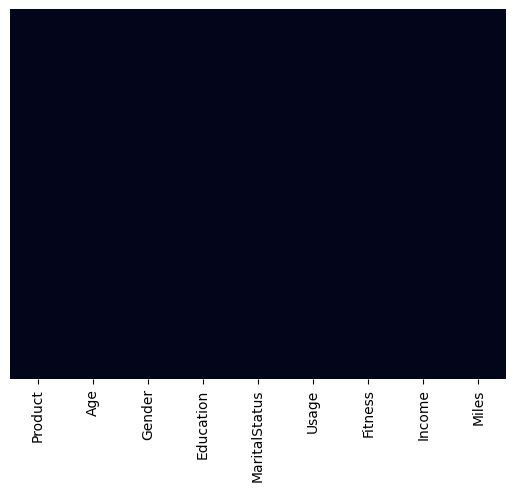

In [31]:
# Plotting the amount of null values columnwise using a heat map
# Observation
# There are no missing value in any column.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

In [32]:
# Outliers for 'Age' attribute
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
df[(df['Age']<q1-1.5*iqr) | (df['Age']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,KP281,47,Male,16,Partnered,4,3,56850,94
79,KP281,50,Female,16,Partnered,3,3,64809,66
139,KP481,48,Male,16,Partnered,2,3,57987,64
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [33]:
# Outliers for 'Education' attribute
q1 = df['Education'].quantile(0.25)
q3 = df['Education'].quantile(0.75)
iqr = q3 - q1
df[(df['Education']<q1-1.5*iqr) | (df['Education']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200


In [34]:
# Outliers for 'Usage' attribute
q1 = df['Usage'].quantile(0.25)
q3 = df['Usage'].quantile(0.75)
iqr = q3 - q1
df[(df['Usage']<q1-1.5*iqr) | (df['Usage']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200


In [35]:
# Outliers for 'Fitness' attribute
q1 = df['Fitness'].quantile(0.25)
q3 = df['Fitness'].quantile(0.75)
iqr = q3 - q1
df[(df['Fitness']<q1-1.5*iqr) | (df['Fitness']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21


In [36]:
# Outliers for 'Income' attribute
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
df[(df['Income']<q1-1.5*iqr) | (df['Income']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260


In [37]:
# Outliers for 'Miles' attribute
q1 = df['Miles'].quantile(0.25)
q3 = df['Miles'].quantile(0.75)
iqr = q3 - q1
df[(df['Miles']<q1-1.5*iqr) | (df['Miles']>q3+1.5*iqr)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200


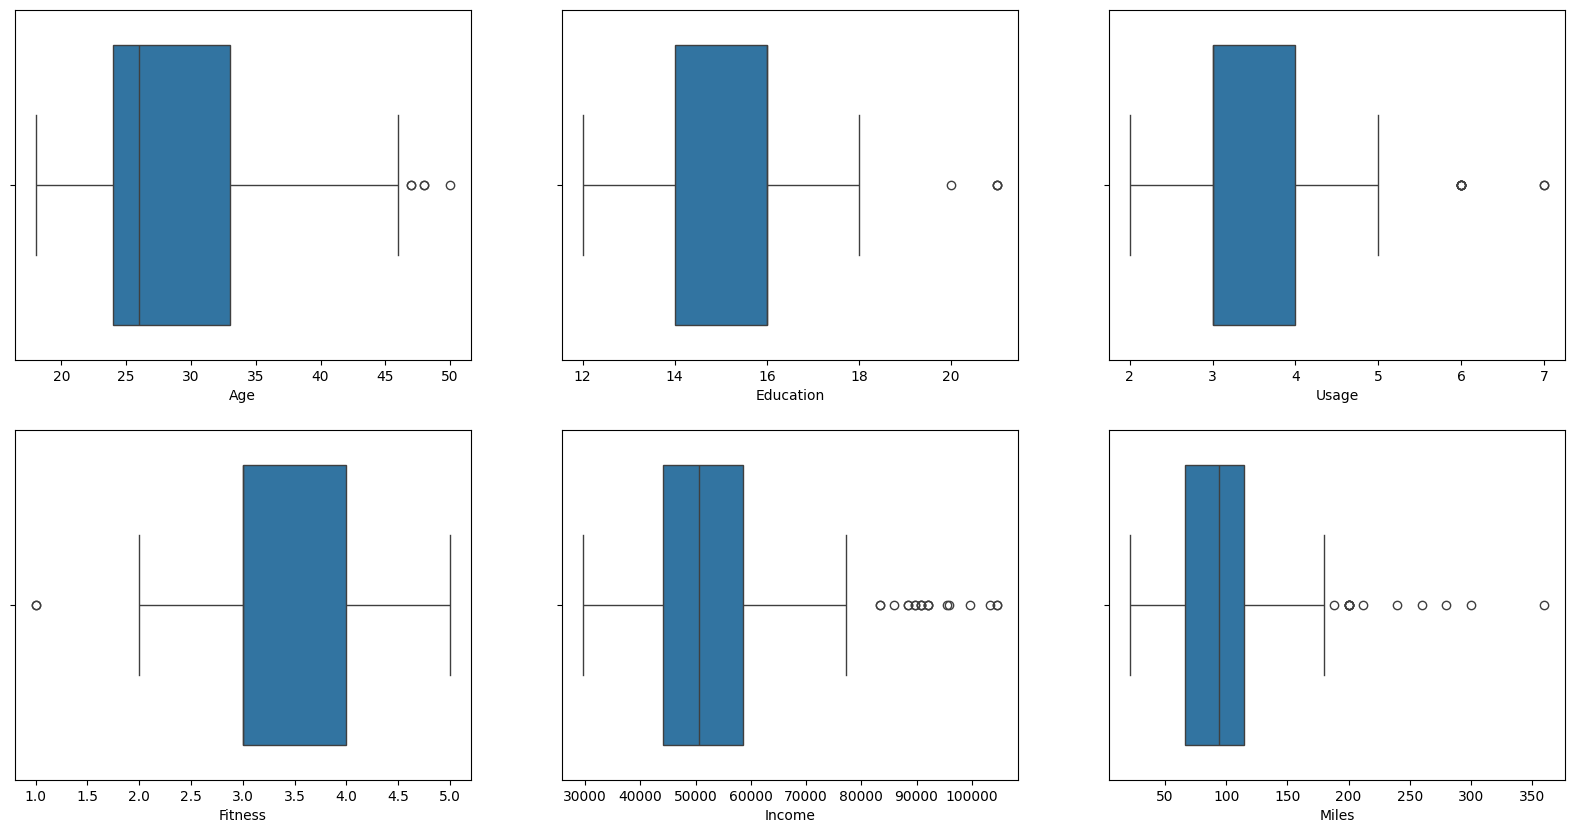

In [38]:
# Below subplot shows the distribution of data for each numerical attributes.
# Observation
# There are few outliers in each attributes.
# 50% of customers have 14-16 years of education. Also, they use the product for 3-4 times in a week.
# Median income of customers using the product is 50000 dollars.
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')
plt.show()

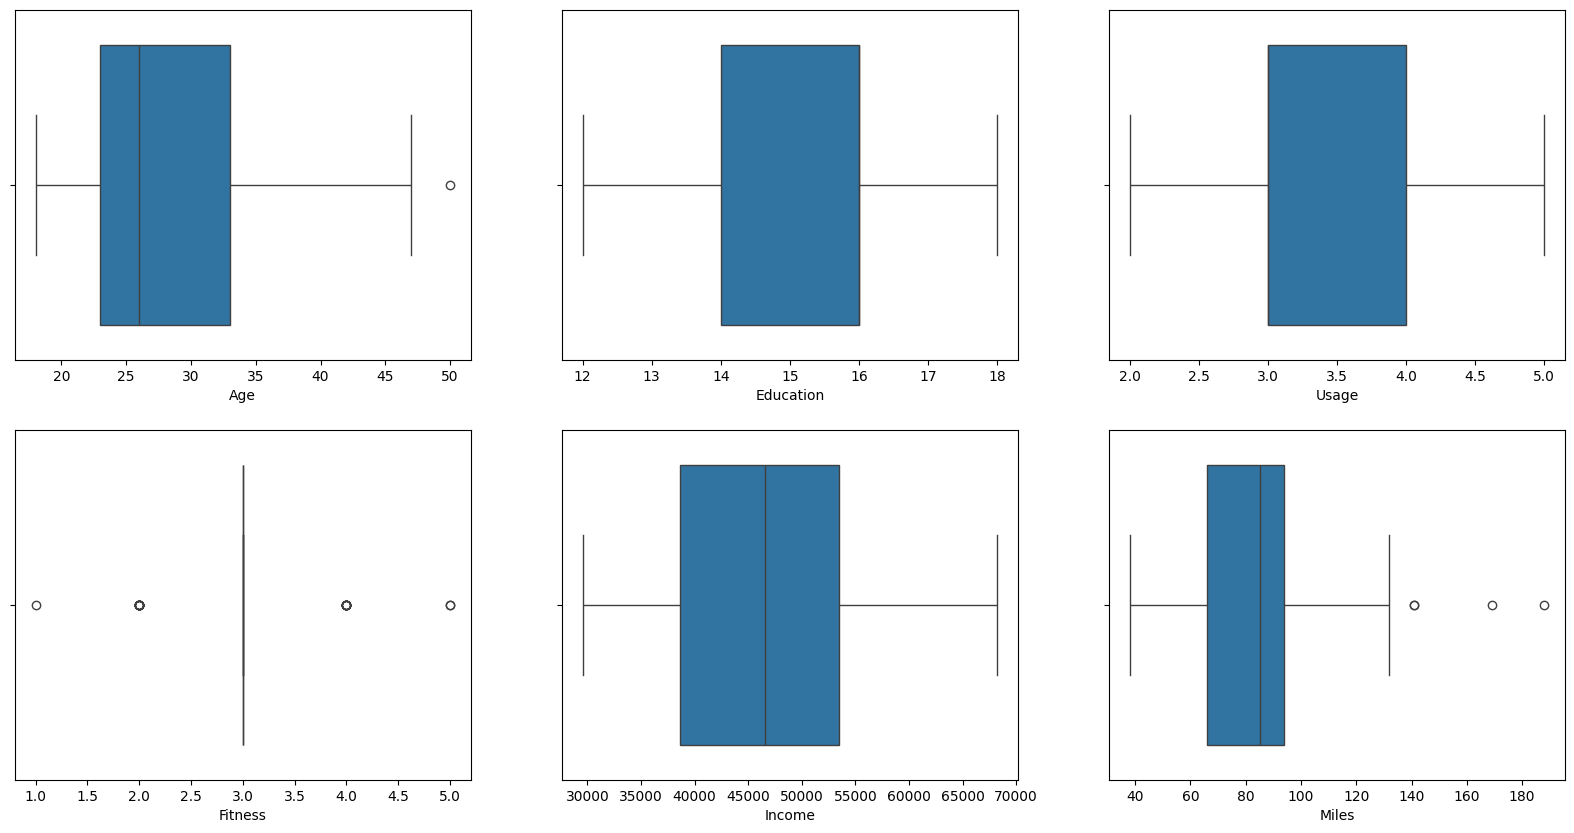

In [39]:
# Below subplot shows the distribution of data for each numerical attributes for product KP281.
# Observation
# There are few outliers in some attributes but Education and Income of customers using this product is evenly distributed.
# 50% of customers have 14-16 years of education. Also, they use the product for 3-4 times in a week.
# Median income of customers using the product is 46000 dollars.
# Most of the users of this product are less than 35 years of age, run less than 100 miles each week and rate their fitness as 3 out of 5.
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=KP281,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=KP281,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=KP281,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=KP281,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=KP281,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=KP281,x='Miles')
plt.show()

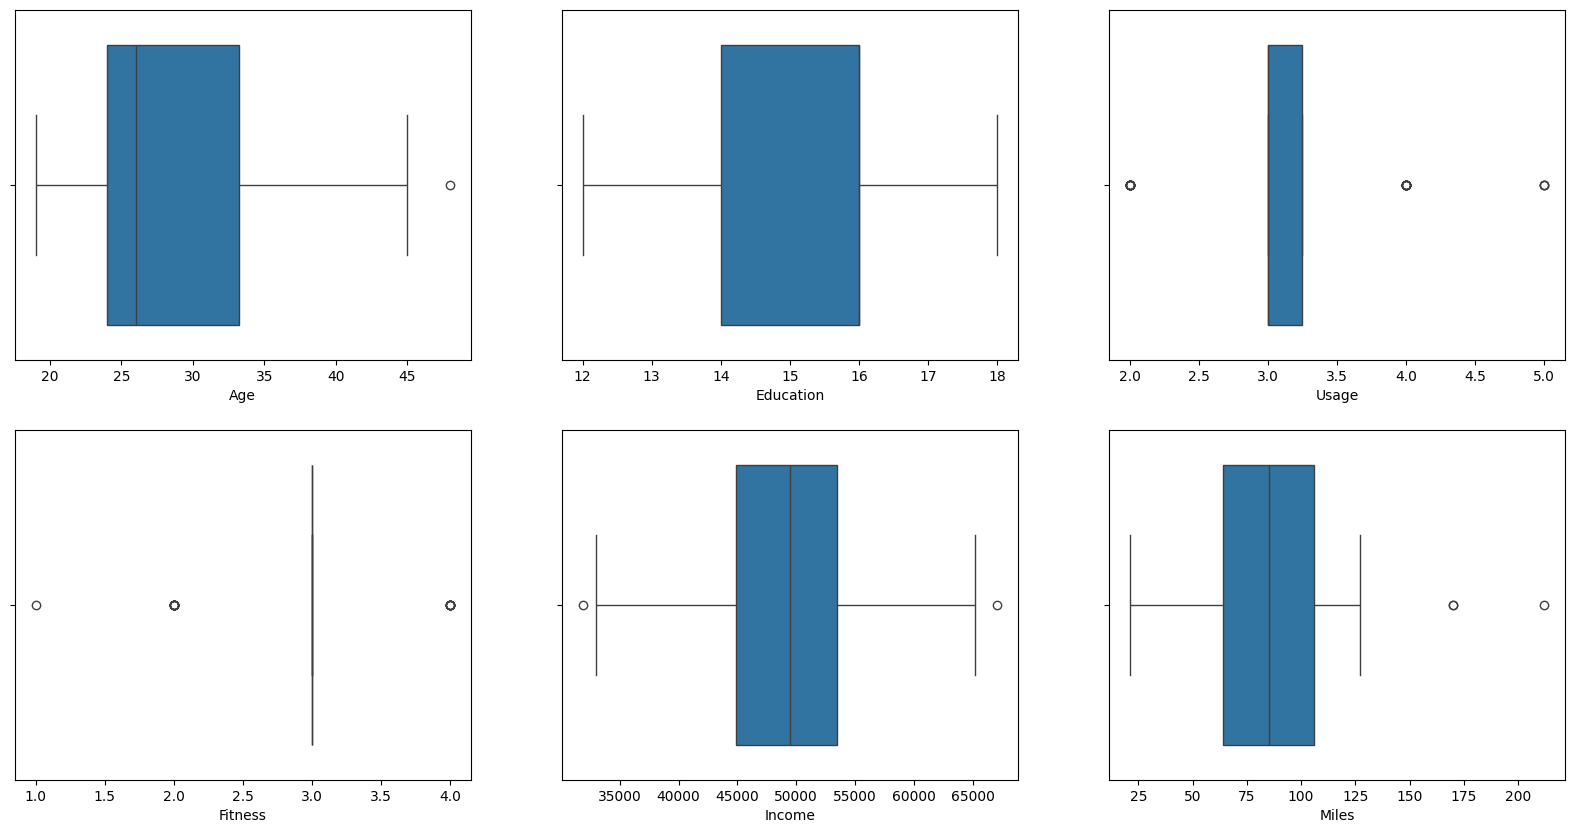

In [40]:
# Below subplot shows the distribution of data for each numerical attributes for product KP481.
# Observation
# There are few outliers in some attributes but Education and Income of customers using this product is evenly distributed.
# 50% of customers have 14-16 years of education. Also, they use the product for around 3 times in a week.
# Median income of customers using the product is around 50000 dollars.
# Most of the users of this product are less than 35 years of age, run around 100 miles each week and rate their fitness as 3 out of 5. 
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=KP481,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=KP481,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=KP481,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=KP481,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=KP481,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=KP481,x='Miles')
plt.show()

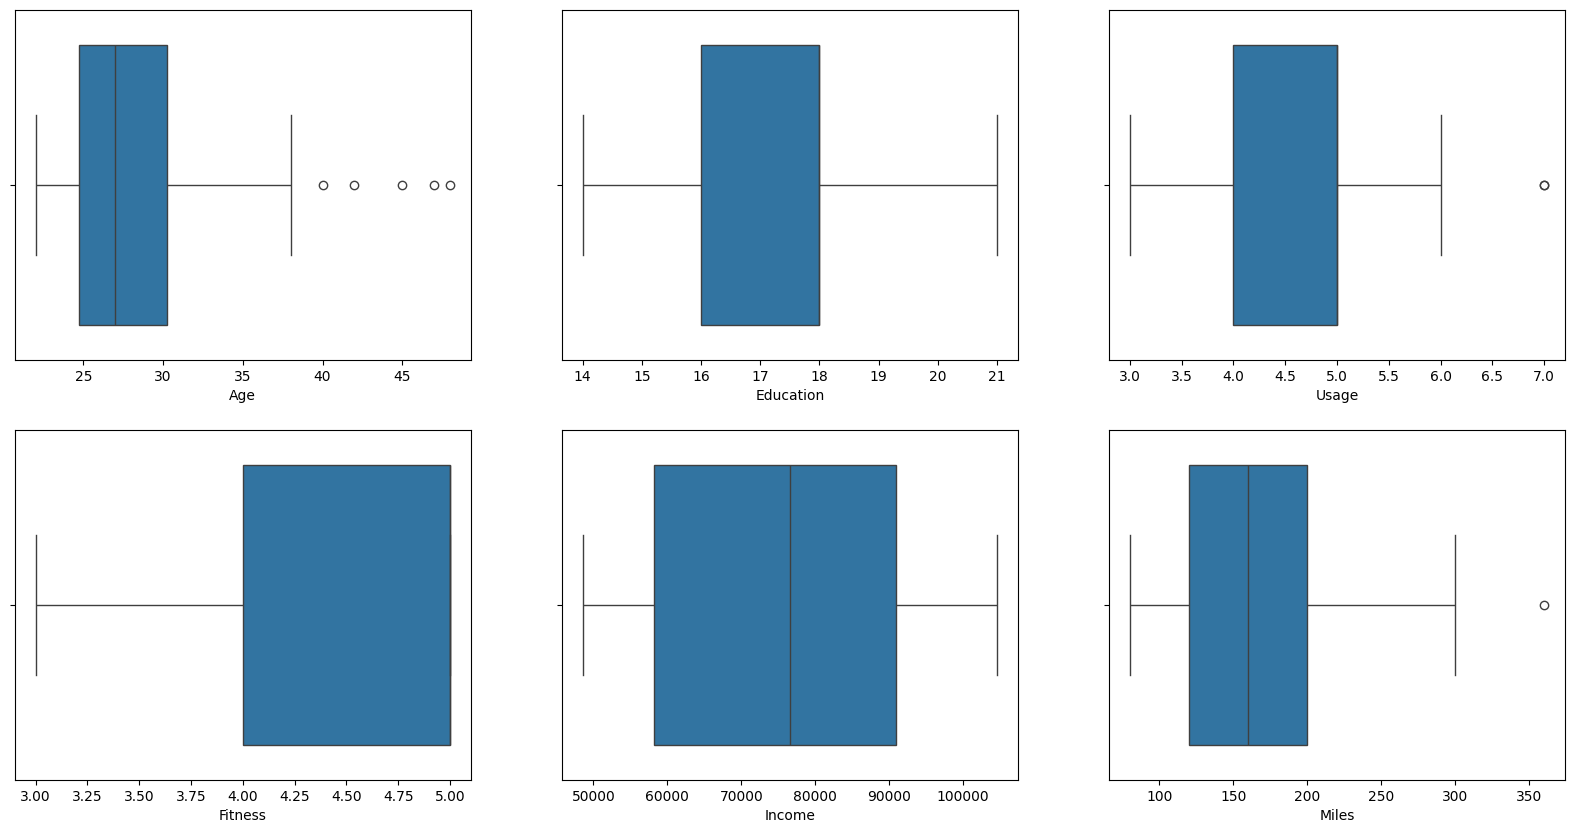

In [41]:
# Below subplot shows the distribution of data for each numerical attributes for product KP781.
# Observation
# There are few outliers in age, usage and miles.
# 50% of customers have 16-18 years of education. Also, they use the product for 4-5 times in a week.
# Median income of customers using the product is around 75000 dollars.
# Most of the users of this product are less than 30 years of age, runs more than 100 miles each week and rate their fitness as above 4 out of 5. 
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=KP781,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=KP781,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=KP781,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=KP781,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=KP781,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=KP781,x='Miles')
plt.show()

## 6. Visual Analysis - Univariate, Bivariate & Correlation

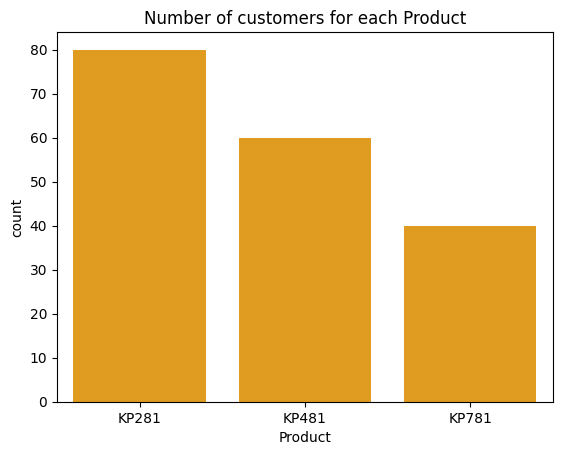

In [42]:
# Below countplot shows the number of users for each product.
# Observation
# 1. Product KP281 has the maximum number of users.
# 2. Product KP781 has least number of users.
sns.countplot(data=df,x='Product',color='orange')
plt.title('Number of customers for each Product')
plt.show()

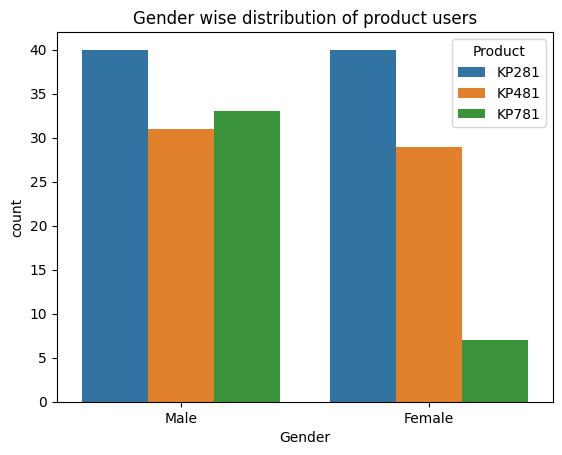

In [43]:
# Below countplot shows the distribution of users for each product based on gender.
# Observation
# 1. For the basic product(KP281), number of male and female customers are same.
# 2. For intermediate(KP481) and advanced(KP781) product, number of male customers are more compared to females.
sns.countplot(data=df,x='Gender',hue='Product')
plt.title('Gender wise distribution of product users')
plt.show()

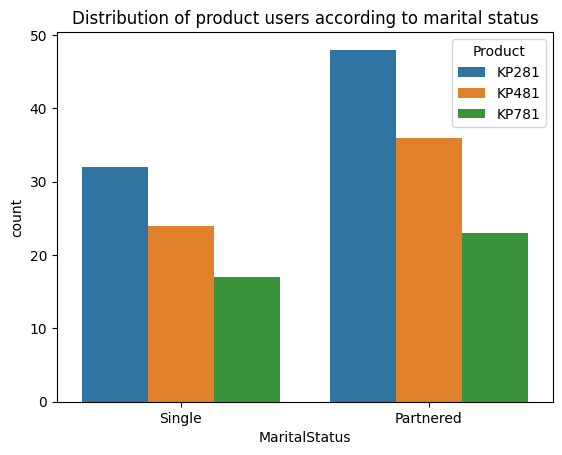

In [44]:
# Below countplot shows the distribution of users for each product based on gender.
# Observation
# Married customers are more than single customers for each products.
sns.countplot(data=df,x='MaritalStatus',hue='Product')
plt.title('Distribution of product users according to marital status')
plt.show()

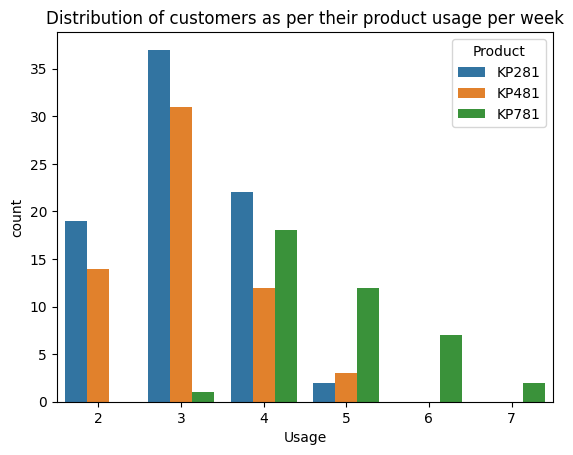

In [45]:
# Below countplot shows distribution of customers as per their product usage per week.
# Observation
# More number of customers use the product 3 times a week and they prefer the basic(KP281) and intermediate(KP481) product.
# Customers using the product for 5 or more times usually prefer the advanced(KP781) product. 
sns.countplot(data=df,x='Usage',hue='Product')
plt.title("Distribution of customers as per their product usage per week")
plt.show()

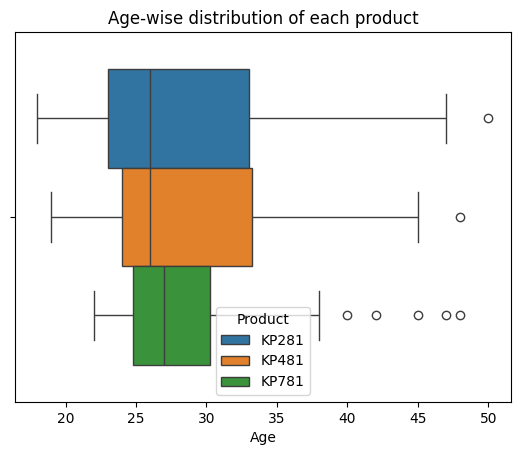

In [46]:
# Below box plot shows Age-wise distribution of each product
# Observation
# Median age for the basic and intermediate level product users is less than the median age of advanced level product.
sns.boxplot(data=df,x='Age',hue='Product')
plt.title('Age-wise distribution of each product')
plt.show()

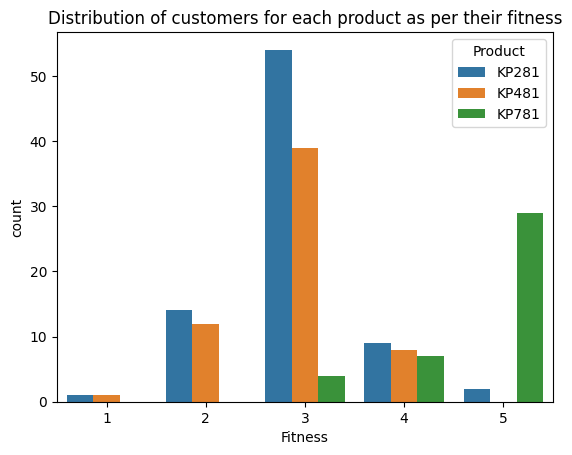

In [47]:
# Below countplot shows distribution of customers for each product as per their fitness.
# Observation
# 1. We can see for people having low rating on fitness mostly prefer basic and intermediate product.
# 2. People having higher level of fitness prefer the advanced product.
sns.countplot(data=df,x='Fitness',hue='Product')
plt.title('Distribution of customers for each product as per their fitness')
plt.show()

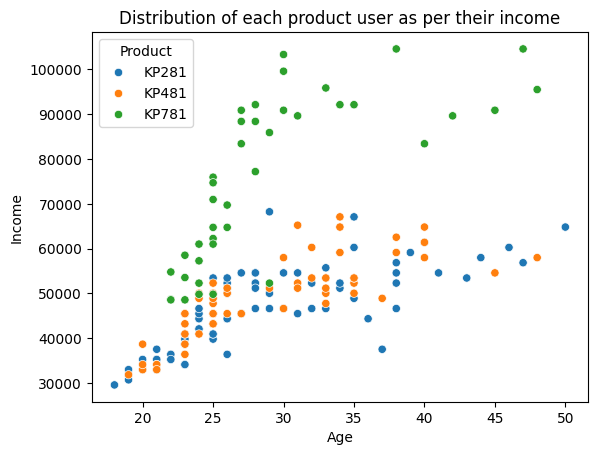

In [48]:
# Below scatterplot show distribution of each product user as per their income.
# Observation
# People having higher income mostly prefer the advance level(KP781) of the product.
sns.scatterplot(data=df,x='Age',y='Income',hue='Product')
plt.title('Distribution of each product user as per their income')
plt.show()

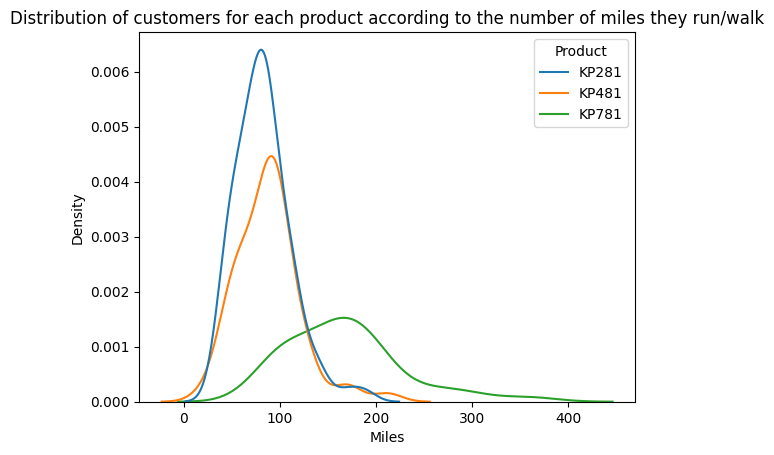

In [49]:
# Below plot shows distribution of customers for each product according to the number of miles they run/walk.
# Observation
# As the advancement of product increases the number of miles ran/walked  by customers increases.
sns.kdeplot(data=df,x='Miles',hue='Product')
plt.title('Distribution of customers for each product according to the number of miles they run/walk')
plt.show()

In [50]:
# Co-relation matrix between attributes.
df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


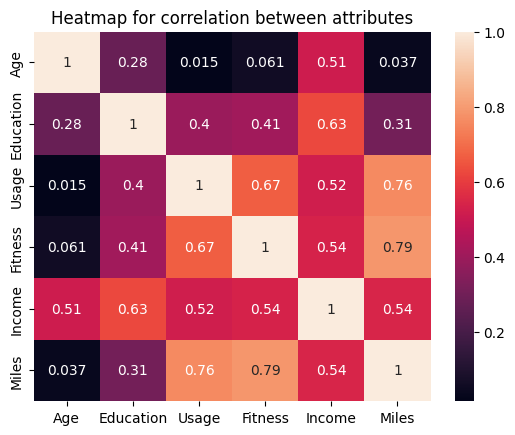

In [51]:
# Below heatmap shows the correlation between different numerical attributes.
# Observation
# 1. Fitness & number of miles ran/walked is most positively correlated.
# 2. Age & Usage is most negatively co-related.
sns.heatmap(data=df.corr(numeric_only=True),annot=True)
plt.title('Heatmap for correlation between attributes')
plt.show()

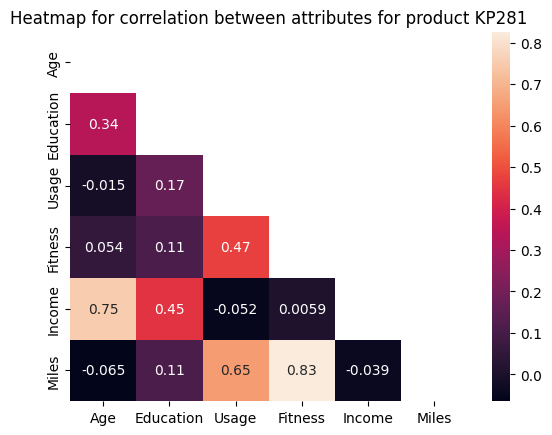

In [52]:
# Below heatmap shows the correlation between different numerical attributes for product KP281.
# Observation
# 1. Fitness & number of miles ran/walked is most positively correlated.
# 2. Age & number of miles is most negatively co-related.
mask = np.triu(np.ones_like(KP281.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=KP281.corr(numeric_only=True),mask=mask,annot=True)
plt.title('Heatmap for correlation between attributes for product KP281')
plt.show()

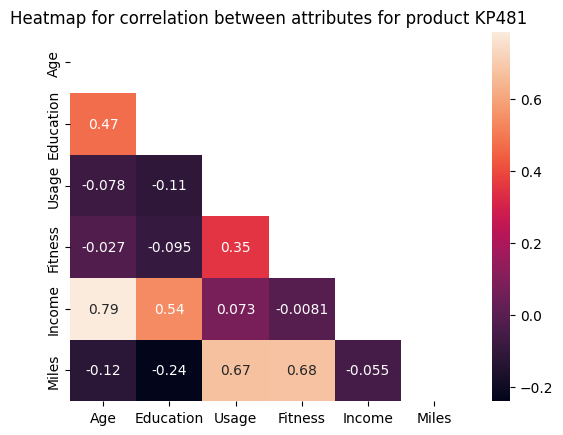

In [53]:
# Below heatmap shows the correlation between different numerical attributes for product KP481.
# Observation
# 1. Income &  age is most positively correlated for this product customers.
# 2. Miles ran/walked & numbers of years of education is most negatively co-related.
mask = np.triu(np.ones_like(KP481.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=KP481.corr(numeric_only=True),mask=mask,annot=True)
plt.title('Heatmap for correlation between attributes for product KP481')
plt.show()

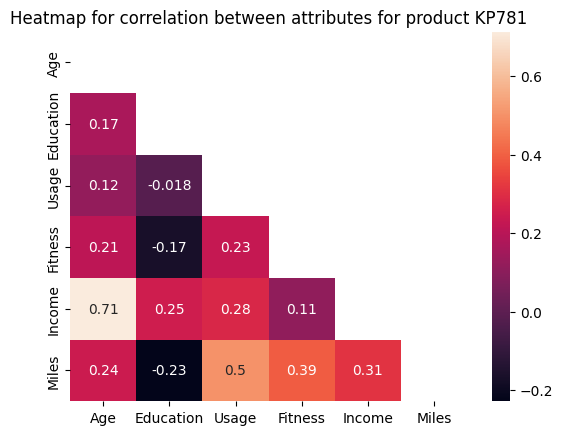

In [54]:
# Below heatmap shows the correlation between different numerical attributes for product KP781.
# Observation
# 1. Income &  age is most positively correlated for this product customers.
# 2. Miles ran/walked & numbers of years of education is most negatively co-related.
mask = np.triu(np.ones_like(KP781.corr(numeric_only=True), dtype=bool))
sns.heatmap(data=KP781.corr(numeric_only=True),mask=mask,annot=True)
plt.title('Heatmap for correlation between attributes for product KP781')
plt.show()

## 7. Contigency Table - Marginal & Conditional Probablities

In [55]:
# Number of customers for each product
pd.crosstab(df['Product'],'No_of_customers')

col_0,No_of_customers
Product,
KP281,80
KP481,60
KP781,40


In [56]:
# Percentages of customer using product KP281, KP481 & KP781 are 44.44%, 33.33% and 22.22%.
pd.crosstab(df['Product'],'No_of_customers',normalize=True)

col_0,No_of_customers
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [57]:
# Number of customers for each product based on their marital status.
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [58]:
# Percentage of partnered customers for product KP281, KP481 & KP781 are 26.67%, 20% and 12.78%.
# Percentage of single customers for product KP281, KP481 & KP781 are 17.78%, 13.34% and 9.4%.
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [59]:
# Percentage of customer being partnered and single, given that they are using product KP281 is 60% and 40% respectively.
# Percentage of customer being partnered and single, given that they are using product KP481 is 60% and 40% respectively.
# Percentage of customer being partnered and single, given that they are using product KP781 is 57.5% and 42.5% respectively.
pd.crosstab(df['Product'],df['MaritalStatus'],margins=True,normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


In [60]:
# Percentage of customer using product KP281, KP481 & KP781 given that they are Partnered is 44.85% and 43.83% respectively.
# Percentage of customer using product KP281, KP481 & KP781 given that they are single is 33.64% and 32.87% respectively.
pd.crosstab(df['Product'],df['MaritalStatus'],normalize='columns',margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


In [61]:
# Number of customers for each product based on gender.
pd.crosstab(df['Product'],df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [62]:
# Percentage of male customers for product KP281, KP481 & KP781 are 22.22%, 17.22 & 18.33% respectively.
# Percentage of female customers for product KP281, KP481 & KP781 are 22.22%, 16.11% and 3.88% respectively.
pd.crosstab(df['Product'],df['Gender'],margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [63]:
# Percentage of customer being male and female, given that they are using product KP281 is 50% and 50% respectively.
# Percentage of customer being male and female, given that they are using product KP481 is 48.33% and 51.67% respectively.
# Percentage of customer being male and female, given that they are using product KP781 is 17.5% and 82.5% respectively.
pd.crosstab(df['Product'],df['Gender'],normalize='index',margins=True)

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


In [64]:
# Percentage of customer using product KP281, KP481 & KP781 given that they are female is 52.63% and 38.46% respectively.
# Percentage of customer using product KP281, KP481 & KP781 given that they are single is 38.15% and 29.80% respectively.
pd.crosstab(df['Product'],df['Gender'],normalize='columns',margins=True)

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


In [65]:
# Number of customers for each product based on number of years of education.
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['Less than or equal to 15','Greater than 15'])
            ,margins=True)

Education,Less than or equal to 15,Greater than 15,All
Product,,,
KP281,39,41,80
KP481,27,33,60
KP781,2,38,40
All,68,112,180


In [66]:
# 1. Percentage of customers having 15 or less years of education for product KP281, KP481 & KP781
# are 21.67%, 15% & 1.11% respectively.
# 2. Percentage of customers having greater than 15 years of education for product KP281, KP481 & KP781 
# are 22.78%, 18.33% & 21.11% respectively.
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['Less than or equal to 15','Greater than 15']
                                ),margins=True,normalize=True)

Education,Less than or equal to 15,Greater than 15,All
Product,,,
KP281,0.216667,0.227778,0.444444
KP481,0.150000,0.183333,0.333333
KP781,0.011111,0.211111,0.222222
All,0.377778,0.622222,1.000000


In [67]:
# 1. Percentage of customer having less than or equal to 15 or greater than 15 years of education, 
# given that they are using product KP281 is 48.75% and 51.25% respectively.
# 2. Percentage of customer having less than or equal to 15 or greater than 15 years of education, 
# given that they are using product KP481 is 45% and 55% respectively.
# Percentage of customer having less than or equal to 15 or greater than 15 years of education, 
# given that they are using product KP781 is 5% and 95% respectively.
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['Less than or equal to 15',
                                                                        'Greater than 15']),margins=True,normalize='index')

Education,Less than or equal to 15,Greater than 15
Product,,
KP281,0.487500,0.512500
KP481,0.450000,0.550000
KP781,0.050000,0.950000
All,0.377778,0.622222


In [68]:
# 1. Percentage of customer using product KP281,KP481 & KP781 given that they are having less than or 
# equal to 15 years of education is 57.35%, 39.70% & 2.94% respectively.
# 2. Percentage of customer using product KP281, KP481 & KP781 given that they are having greater than 
# 15 years of education is 36.60%, 29.46% and 33.92% respectively.
pd.crosstab(df['Product'],pd.cut(df['Education'],bins=[0,15,30],labels=['Less than or equal to 15',
                                                                        'Greater than 15']),margins=True,normalize='columns')

Education,Less than or equal to 15,Greater than 15,All
Product,,,
KP281,0.573529,0.366071,0.444444
KP481,0.397059,0.294643,0.333333
KP781,0.029412,0.339286,0.222222


In [69]:
# Number of customers for each product based on age.
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['Under or equal 20','20-30','30-40',
                                                                        '40-50']),margins=True)

Age,Under or equal 20,20-30,30-40,40-50,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [70]:
# Percentage of customers of age <=20 for product KP281, KP481 & KP781 are 3.33%, 2.22% & 0% respectively.
# Percentage of customers of age >20 & <=30 for product KP281, KP481 & KP781 are 27.22%, 17.22% & 16.67% respectively.
# Percentage of customers of age >30 & <=40 for product KP281, KP481 & KP781 are 10.55%, 12.78% & 3.33% respectively.
# Percentage of customers of age >40 & <=50 for product KP281, KP481 & KP781 are 3.33%, 1.11% & 2.22% respectively.
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['Under or equal 20','20-30','30-40',
                                                                        '40-50']),margins=True,normalize=True)

Age,Under or equal 20,20-30,30-40,40-50,All
Product,,,,,
KP281,0.033333,0.272222,0.105556,0.033333,0.444444
KP481,0.022222,0.172222,0.127778,0.011111,0.333333
KP781,0.000000,0.166667,0.033333,0.022222,0.222222
All,0.055556,0.611111,0.266667,0.066667,1.000000


In [71]:
# 1. Percentage of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product 
# KP281 is 7.5%, 61.25%, 23.75% & 7.5% respectively.
# 2. Percentage of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product 
# KP481 is 6.67%, 51.67%, 38.33% & 3.33% respectively.
# 3. Percentage of customer having age [<=20, >20&<=30, >30&<=40, >40&<=50], given that they are using product 
# KP781 is 0%, 75%, 15% & 10% respectively.
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['Under or equal 20','20-30','30-40',
                                                                        '40-50']),margins=True,normalize='index')

Age,Under or equal 20,20-30,30-40,40-50
Product,,,,
KP281,0.075000,0.612500,0.237500,0.075000
KP481,0.066667,0.516667,0.383333,0.033333
KP781,0.000000,0.750000,0.150000,0.100000
All,0.055556,0.611111,0.266667,0.066667


In [72]:
# 1.Percentage of customer using product KP281,KP481 & KP781 given that they are of 
# age under or equal to 20 are 60%, 40% & 0% respectively.
# 2. Percentage of customer using product KP281, KP481 & KP781 given that they are of 
# age >20 & <=30 are 44.54%, 28.18% & 27.27% respectively.
# 3. Percentage of customer using product KP281, KP481 & KP781 given that they are of 
# age >30 & <=40 are 39.58.54%, 47.91% & 12.50% respectively.
# 4. Percentage of customer using product KP281, KP481 & KP781 given that they are of 
# age >40 & <=50 are 50%, 16.67%, 33.33% respectively.
pd.crosstab(df['Product'],pd.cut(df['Age'],bins=[0,20,30,40,50],labels=['Under or equal 20','20-30',
                                                                        '30-40','40-50']),margins=True,normalize='columns')

Age,Under or equal 20,20-30,30-40,40-50,All
Product,,,,,
KP281,0.6,0.445455,0.395833,0.500000,0.444444
KP481,0.4,0.281818,0.479167,0.166667,0.333333
KP781,0.0,0.272727,0.125000,0.333333,0.222222


In [73]:
# Number of customers for each product based on income.
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],
                                 labels=['Less than or equal 30000','30000-50000','50000-70000',
                                         '70000-90000','90000-110000']),margins=True)

Income,Less than or equal 30000,30000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,,
KP281,1,47,32,0,0,80
KP481,0,30,30,0,0,60
KP781,0,5,12,11,12,40
All,1,82,74,11,12,180


In [74]:
# Percentage of customers having income less than equal to 30000 for product KP281, KP481 & KP781 are 0.5%, 0% & 0% respectively.
# Percentage of customers having income >30000 & <=50000 for product KP281, KP481 & KP781 are 26.11%, 16.67% & 2.77% respectively.
# Percentage of customers having income >50000 & <=70000 for product KP281, KP481 & KP781 are 17.78%, 16.67% & 6.67% respectively.
# Percentage of customers having income >70000 & <=90000 for product KP281, KP481 & KP781 are 0%, 0% & 6.11% respectively.
# Percentage of customers having income >90000 & <=110000 for product KP281, KP481 & KP781 are 0%, 0% & 6.67% respectively.
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['Less than or equal 30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize=True)

Income,Less than or equal 30000,30000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,,
KP281,0.005556,0.261111,0.177778,0.000000,0.000000,0.444444
KP481,0.000000,0.166667,0.166667,0.000000,0.000000,0.333333
KP781,0.000000,0.027778,0.066667,0.061111,0.066667,0.222222
All,0.005556,0.455556,0.411111,0.061111,0.066667,1.000000


In [75]:
# Percentage of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using 
# product KP281 is 1.25%, 58.7%, 40%, 0% & 0% respectively.
# Percentage of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using 
# product KP481 is 0%, 50%, 50%, 0% & 0% respectively.
# Percentage of customer having income [<=30000, >30000&<=50000, >50000&<=70000, >70000&<=90000, >90000&<=110000], given that they are using 
# product KP781 is 0%, 12.50%, 30%, 27.50% & 30% respectively.
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['Less than or equal 30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize='index')

Income,Less than or equal 30000,30000-50000,50000-70000,70000-90000,90000-110000
Product,,,,,
KP281,0.012500,0.587500,0.400000,0.000000,0.000000
KP481,0.000000,0.500000,0.500000,0.000000,0.000000
KP781,0.000000,0.125000,0.300000,0.275000,0.300000
All,0.005556,0.455556,0.411111,0.061111,0.066667


In [76]:
# Percentage of customer using product KP281,KP481 & KP781 given that they have income less than or equal to 30000 are 100%, 0%, & 0% respectively.
# Percentage of customer using product KP281,KP481 & KP781 given that they have income >30000&<=50000 are 57.31%, 36.58% & 6.09%  respectively.
# Percentage of customer using product KP281,KP481 & KP781 given that they have income >50000&<=70000 are 43.24%, 40.54% & 16.21% respectively.
# Percentage of customer using product KP281,KP481 & KP781 given that they have income >70000&<=90000 are 0%, 0% & 100% respectively.
# Percentage of customer using product KP281,KP481 & KP781 given that they have income >90000&<=110000 are 0%, 0% & 100% respectively.
pd.crosstab(df['Product'],pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],labels=['Less than or equal 30000',
                                                                                              '30000-50000','50000-70000','70000-90000',
                                                                                              '90000-110000']),margins=True,normalize='columns')

Income,Less than or equal 30000,30000-50000,50000-70000,70000-90000,90000-110000,All
Product,,,,,,
KP281,1.0,0.573171,0.432432,0.0,0.0,0.444444
KP481,0.0,0.365854,0.405405,0.0,0.0,0.333333
KP781,0.0,0.060976,0.162162,1.0,1.0,0.222222


## 8. Customer profiling

In [77]:
# Number of customers for each product based on gender, MaritalStatus, Income,and age.
pd.crosstab(columns=[df['Product'],df['Gender'],df['MaritalStatus']],index=[pd.cut(df['Age'],bins=[0,20,30,40,50],
                                                                                   labels=['Under 20','20-30','30-40','40-50']),
                                                                            pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],
                                                                                   labels=['Less than 30000','30000-50000','50000-70000',
                                                                                           '70000-90000','90000-110000'])],
            margins=True)

Product                      KP281                             KP481         \
Gender                      Female             Male           Female          
MaritalStatus            Partnered Single Partnered Single Partnered Single   
Age      Income                                                               
Under 20 Less than 30000         0      0         0      1         0      0   
         30000-50000             2      0         1      2         1      0   
20-30    30000-50000            13      7         7      8         5      7   
         50000-70000             6      0         3      5         1      3   
         70000-90000             0      0         0      0         0      0   
         90000-110000            0      0         0      0         0      0   
30-40    30000-50000             2      2         2      1         1      1   
         50000-70000             2      3         5      2         7      3   
         70000-90000             0      0         0      0         0      0   
         90000-110000            0      0         0      0         0      0   
40-50    50000-70000             2      1         3      0         0      0   
         70000-90000             0      0         0      0         0      0   
         90000-110000            0      0         0      0         0      0   
All                             27     13        21     19        15     14   

Product                                       KP781                          \
Gender                        Male           Female             Male          
MaritalStatus            Partnered Single Partnered Single Partnered Single   
Age      Income                                                               
Under 20 Less than 30000         0      0         0      0         0      0   
         30000-50000             0      3         0      0         0      0   
20-30    30000-50000             8      4         0      0         1      4   
         50000-70000             2      1         1      3         4      4   
         70000-90000             0      0         0      0         6      2   
         90000-110000            0      0         2      0         3      0   
30-40    30000-50000             0      0         0      0         0      0   
         50000-70000             9      2         0      0         0      0   
         70000-90000             0      0         0      0         1      1   
         90000-110000            0      0         1      0         2      1   
40-50    50000-70000             2      0         0      0         0      0   
         70000-90000             0      0         0      0         0      1   
         90000-110000            0      0         0      0         2      1   
All                             21     10         4      3        19     14   

Product                   All  
Gender                         
MaritalStatus                  
Age      Income                
Under 20 Less than 30000    1  
         30000-50000        9  
20-30    30000-50000       64  
         50000-70000       33  
         70000-90000        8  
         90000-110000       5  
30-40    30000-50000        9  
         50000-70000       33  
         70000-90000        2  
         90000-110000       4  
40-50    50000-70000        8  
         70000-90000        1  
         90000-110000       3  
All                       180

In [78]:
# Percentage of customers for each product based on gender, MaritalStatus, Income,and age.
pd.crosstab(columns=[df['Product'],df['Gender'],df['MaritalStatus']],index=[pd.cut(df['Age'],bins=[0,20,30,40,50],
                                                                                   labels=['Under 20','20-30','30-40','40-50']),
                                                                            pd.cut(df['Income'],bins=[0,30000,50000,70000,90000,110000],
                                                                                   labels=['Less than 30000','30000-50000','50000-70000',
                                                                                           '70000-90000','90000-110000'])],
            margins=True,normalize=True)

Product                      KP281                                   KP481  \
Gender                      Female                Male              Female   
MaritalStatus            Partnered    Single Partnered    Single Partnered   
Age      Income                                                              
Under 20 Less than 30000  0.000000  0.000000  0.000000  0.005556  0.000000   
         30000-50000      0.011111  0.000000  0.005556  0.011111  0.005556   
20-30    30000-50000      0.072222  0.038889  0.038889  0.044444  0.027778   
         50000-70000      0.033333  0.000000  0.016667  0.027778  0.005556   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.000000  0.000000   
30-40    30000-50000      0.011111  0.011111  0.011111  0.005556  0.005556   
         50000-70000      0.011111  0.016667  0.027778  0.011111  0.038889   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.000000  0.000000   
40-50    50000-70000      0.011111  0.005556  0.016667  0.000000  0.000000   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.000000  0.000000   
All                       0.150000  0.072222  0.116667  0.105556  0.083333   

Product                                                    KP781            \
Gender                                  Male              Female             
MaritalStatus               Single Partnered    Single Partnered    Single   
Age      Income                                                              
Under 20 Less than 30000  0.000000  0.000000  0.000000  0.000000  0.000000   
         30000-50000      0.000000  0.000000  0.016667  0.000000  0.000000   
20-30    30000-50000      0.038889  0.044444  0.022222  0.000000  0.000000   
         50000-70000      0.016667  0.011111  0.005556  0.005556  0.016667   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.011111  0.000000   
30-40    30000-50000      0.005556  0.000000  0.000000  0.000000  0.000000   
         50000-70000      0.016667  0.050000  0.011111  0.000000  0.000000   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.005556  0.000000   
40-50    50000-70000      0.000000  0.011111  0.000000  0.000000  0.000000   
         70000-90000      0.000000  0.000000  0.000000  0.000000  0.000000   
         90000-110000     0.000000  0.000000  0.000000  0.000000  0.000000   
All                       0.077778  0.116667  0.055556  0.022222  0.016667   

Product                                            All  
Gender                        Male                      
MaritalStatus            Partnered    Single            
Age      Income                                         
Under 20 Less than 30000  0.000000  0.000000  0.005556  
         30000-50000      0.000000  0.000000  0.050000  
20-30    30000-50000      0.005556  0.022222  0.355556  
         50000-70000      0.022222  0.022222  0.183333  
         70000-90000      0.033333  0.011111  0.044444  
         90000-110000     0.016667  0.000000  0.027778  
30-40    30000-50000      0.000000  0.000000  0.050000  
         50000-70000      0.000000  0.000000  0.183333  
         70000-90000      0.005556  0.005556  0.011111  
         90000-110000     0.011111  0.005556  0.022222  
40-50    50000-70000      0.000000  0.000000  0.044444  
         70000-90000      0.000000  0.005556  0.005556  
         90000-110000     0.011111  0.005556  0.016667  
All                       0.105556  0.077778  1.000000

## 9. Businees Insights

- Entry level product KP281 is having the most number of customers compared to other two products.
- Products is bought more by married customers compared to singles.
- Majority of customers use the product for less than 4 times a week.
- Customers having average fitness mostly prefer the product.
- Median age, education, usage, fitness, income and miles ran each/week of customers are 26 years, 16 years, 3 times, 3, approx 50000 dollars and 94 miles.
- Median age for the basic and intermediate level product users is less than the median age of advanced level product.
- 50% of customers have 14-16 years of education. Also, they use the product for 3-4 times in a week.
- Product KP281 has the maximum number of users and KP781 has least number of users.
- For intermediate(KP481) and advanced(KP781) product, number of male customers are more compared to females.
- Customers using the product for 5 or more times usually prefer the advanced(KP781) product. 
- We can see for people having low rating on fitness mostly prefer basic and intermediate product.People having higher level of fitness prefer the advanced product.
- People having higher income mostly prefer the advance level(KP781) of the product.
- As the advancement of product increases the number of miles ran/walked  by customers increases.
- Fitness & number of miles ran/walked is most positively correlated. Age & Usage is most negatively co-related.
- Percentages of customer using product KP281, KP481 & KP781 are 44.44%, 33.33% and 22.22%.
- Percentage of partnered customers for product KP281, KP481 & KP781 are 26.67%, 20% and 12.78%.
- Percentage of single customers for product KP281, KP481 & KP781 are 17.78%, 13.34% and 9.4%.
- Percentage of male customers for product KP281, KP481 & KP781 are 22.22%, 17.22 & 18.33% respectively.
- Percentage of female customers for product KP281, KP481 & KP781 are 22.22%, 16.11% and 3.88% respectively.
- Percentage of customers having 15 or less years of education for product KP281, KP481 & KP781 are 21.67%, 15% & 1.11% respectively.
- Percentage of customers having greater than 15 years of education for product KP281, KP481 & KP781 are 22.78%, 18.33% & 21.11% respectively.
- Percentage of customers of age <=20 for product KP281, KP481 & KP781 are 3.33%, 2.22% & 0% respectively.
- Percentage of customers of age >20 & <=30 for product KP281, KP481 & KP781 are 27.22%, 17.22% & 16.67% respectively.
- Percentage of customers of age >30 & <=40 for product KP281, KP481 & KP781 are 10.55%, 12.78% & 3.33% respectively.
- Percentage of customers of age >40 & <=50 for product KP281, KP481 & KP781 are 3.33%, 1.11% & 2.22% respectively.
- Percentage of customers having income less than equal to 30000 for product KP281, KP481 & KP781 are 0.5%, 0% & 0% respectively.
- Percentage of customers having income >30000 & <=50000 for product KP281, KP481 & KP781 are 26.11%, 16.67% & 2.77% respectively.
- Percentage of customers having income >50000 & <=70000 for product KP281, KP481 & KP781 are 17.78%, 16.67% & 6.67% respectively.
- Percentage of customers having income >70000 & <=90000 for product KP281, KP481 & KP781 are 0%, 0% & 6.11% respectively.
- Percentage of customers having income >90000 & <=110000 for product KP281, KP481 & KP781 are 0%, 0% & 6.67% respectively.


## 10. Recommendations

- **Focus on the Entry Level Product KP281**: Since it has the most number of customers compared to the other two products, the business should continue to invest in and promote this product.

- **Target Married Customers**: Given that the products are bought more by married customers compared to singles, the business can tailor marketing efforts and offers to appeal specifically to married individuals.
 
- **Encourage Regular Usage**: Since the majority of customers use the product for less than 4 times a week, the business can offer incentives or rewards to encourage more frequent usage.
 
- **Target Average Fitness Customers**: Given that customers with average fitness mostly prefer the product, marketing messages can emphasize how the product can help maintain fitness levels.
 
- **Consider Pricing and Affordability**: Customers with higher income mostly prefer the advanced level product, suggesting that price may not be a major barrier for these customers. However, the business should ensure that pricing remains competitive and consider offering flexible payment options.
 
- **Segmented Marketing Approach**: Given the differences in customer preferences and demographics across product lines, the business can adopt a segmented marketing approach, tailoring messages and offers to specific customer segments.
 
- **Promote Advanced Product for Higher Usage**: Customers using the product for 5 or more times usually prefer the advanced product, suggesting that it may cater to more dedicated or serious users. The business can promote the advanced product as offering advanced features or capabilities suitable for more frequent use.
 
- **Target Customers Based on Fitness Level**: Customers with lower fitness levels prefer basic and intermediate products, while those with higher fitness levels prefer the advanced product. The business can tailor marketing messages to highlight how each product meets the specific needs of customers at different fitness levels.
 
- **Consider Education Levels**: Customers with higher education levels are more likely to prefer the advanced product. The business can consider offering educational materials or resources targeted towards customers with higher education levels to highlight the advanced features of the product.
 
- **Age-Specific Targeting**: The percentage of customers in different age groups varies across products. The business can consider age-specific marketing campaigns or promotions to target different age groups effectively.
 
- **Income-Based Targeting**: Income levels also influence product preferences. The business can tailor pricing strategies or offers to appeal to customers across different income brackets.
 
- **Encourage Female Participation**: Since the percentage of female customers varies across products and is generally lower, the business can develop marketing campaigns or initiatives specifically aimed at attracting more female customers. This could include offering female-focused fitness programs, discounts, or events.
